In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

f_location = "https://drive.google.com/file/d/1abp6Oc3XLvN7x2l2r1RHMjWNwoCTanLV/view?usp=sharing"
data_raw = pd.read_csv('https://drive.google.com/uc?export=download&id=' + f_location.split('/')[-2]) #Convert to pandas DataFrames

target_subjects = ['ABE', 'AE', 'BIOE', 'CEE', 'CS', 'CSE', 'ECE', 'ENG', 'IE', 'ME', 'MSE', 'NPRE', 'PHYS', 'SE', 'TAM', 'TE']

filtered_data = data_raw[data_raw['Subject'].isin(target_subjects)].copy()

In [ ]:
grade_points = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0
}

def calculate_gpa(row):
    total_points = 0
    total_grades = 0

    for grade, points in grade_points.items():
        if grade in row:
            total_points += row[grade] * points
            total_grades += row[grade]
    if total_grades > 0:
        return total_points / total_grades
    else:
        return np.nan


filtered_data['GPA'] = filtered_data.apply(calculate_gpa, axis=1)
filtered_data = filtered_data.dropna(subset=['GPA'])

# compute average GPA per subject for each year/term
subject_gpa = filtered_data.groupby(['Year', 'Subject'])['GPA'].mean().reset_index()

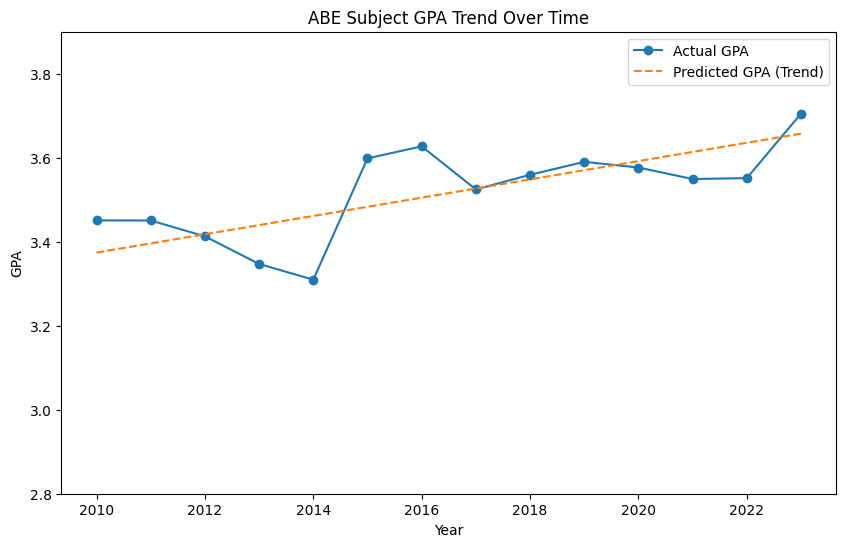

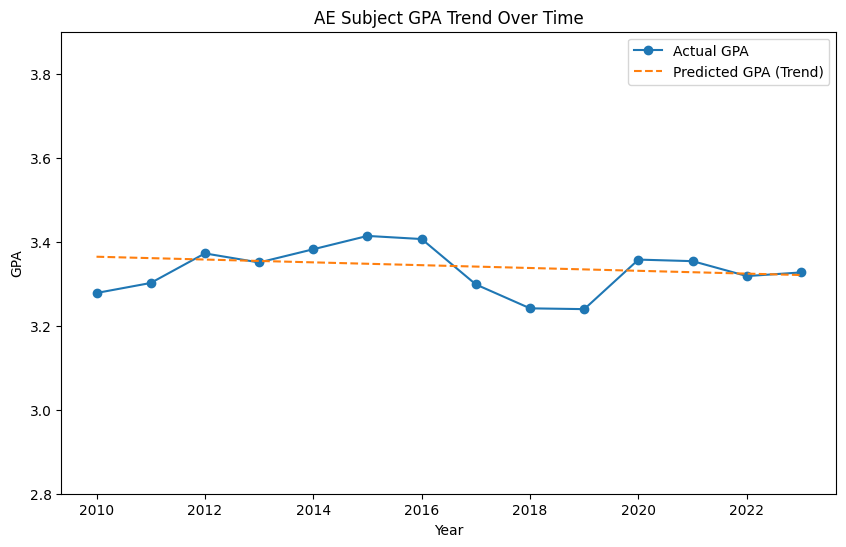

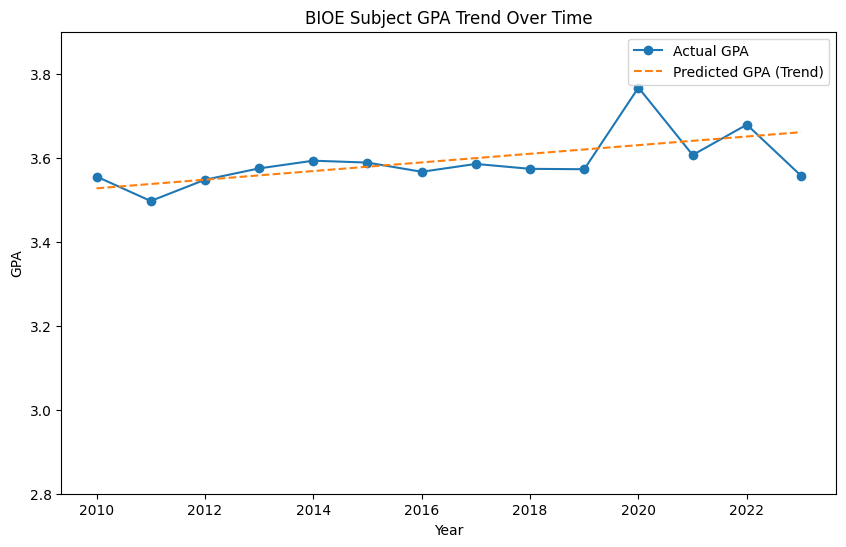

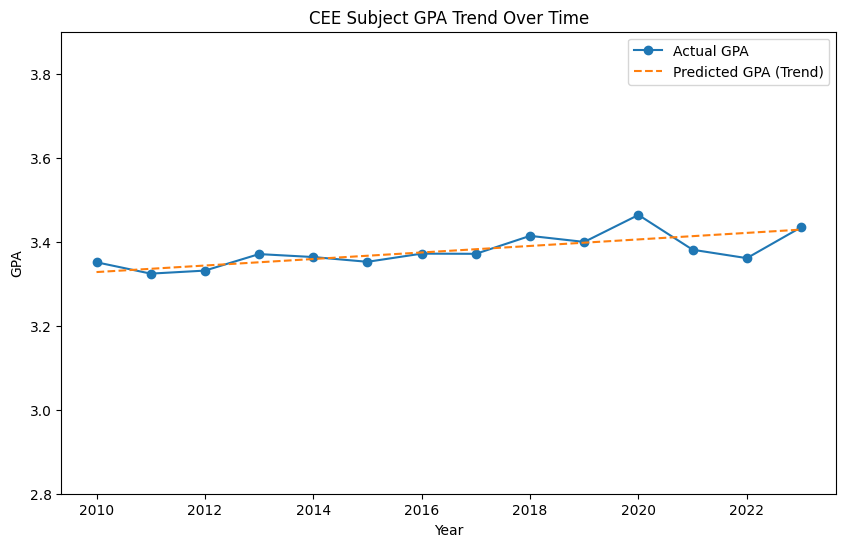

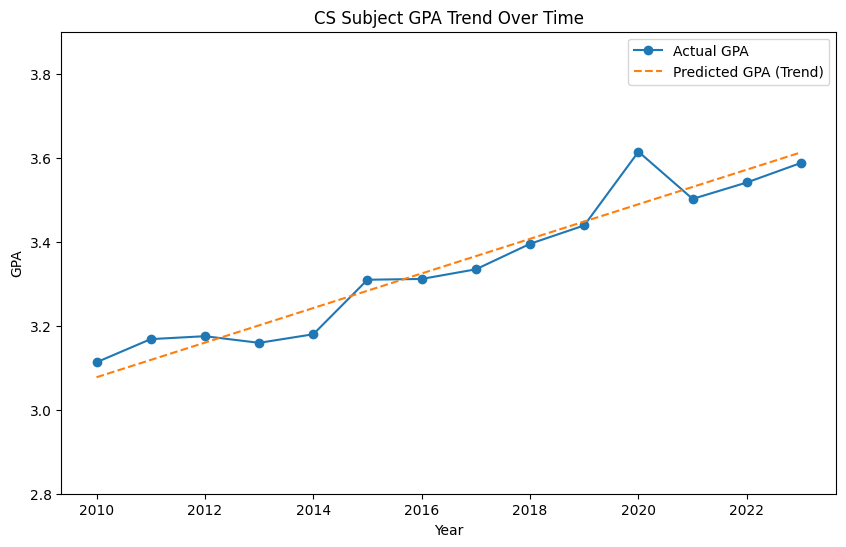

Skipping CSE due to insufficient data


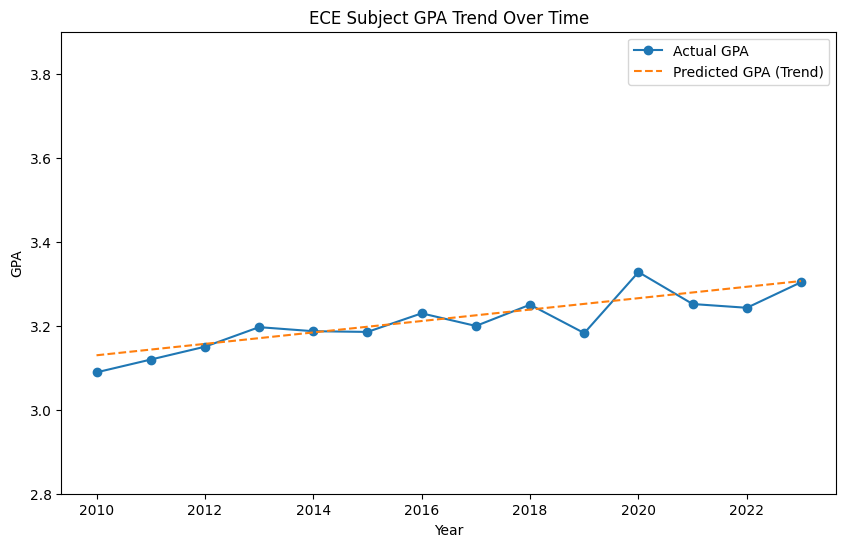

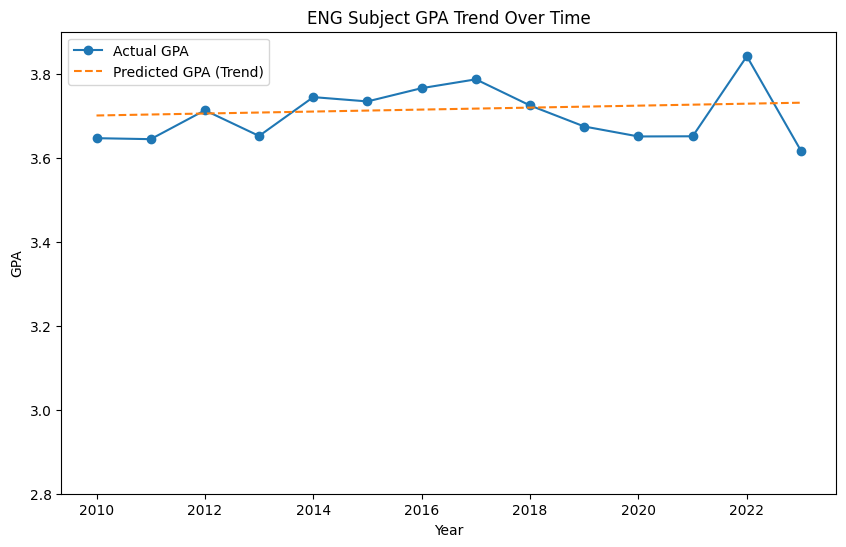

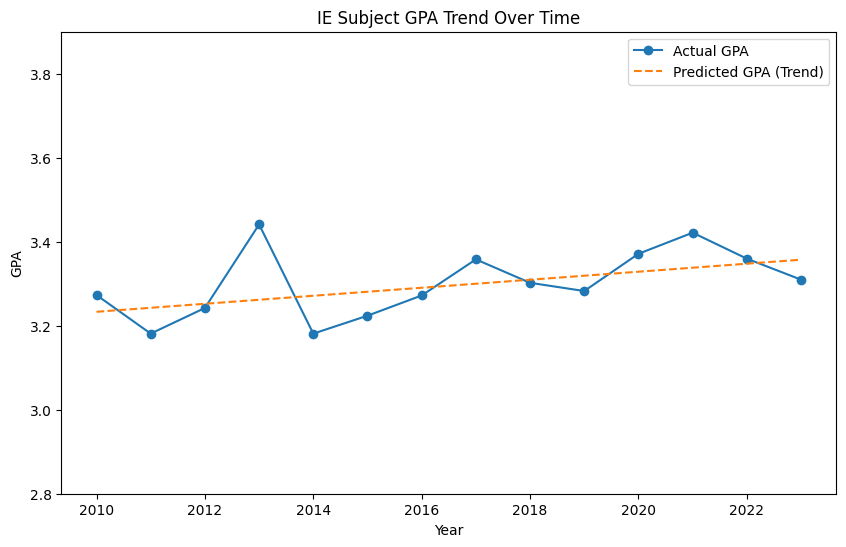

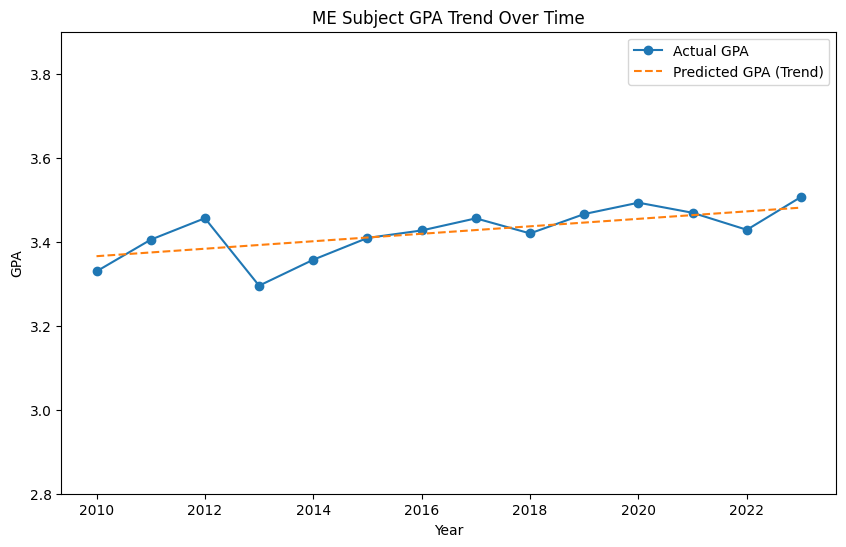

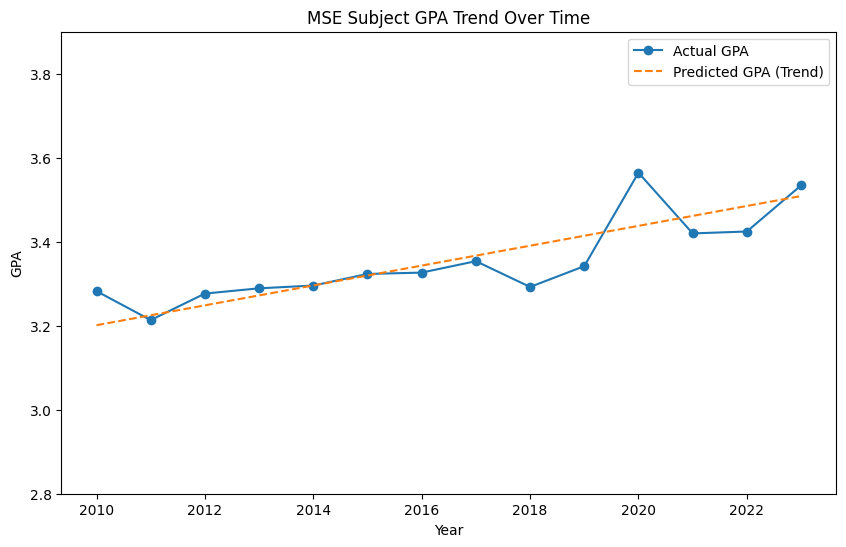

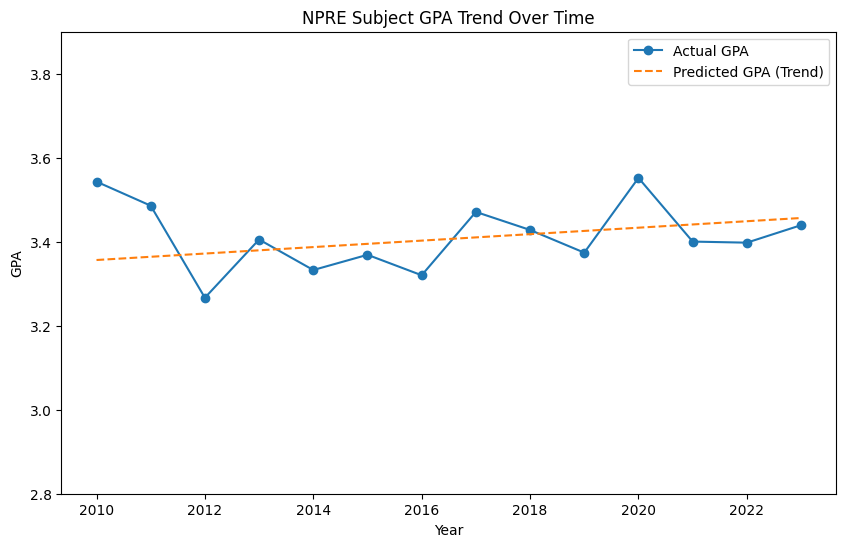

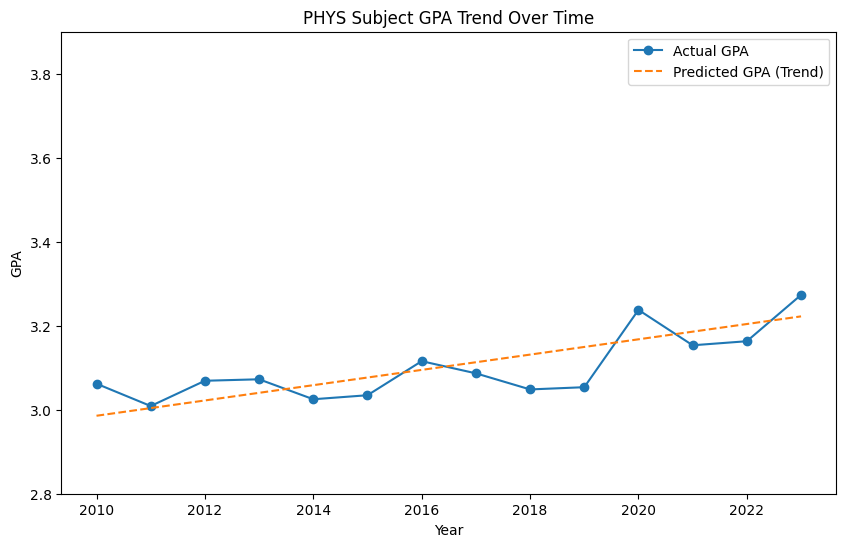

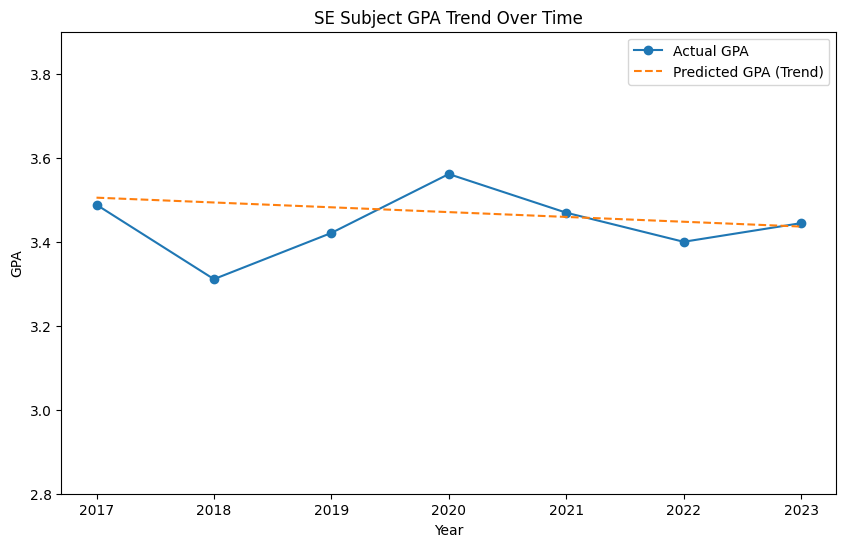

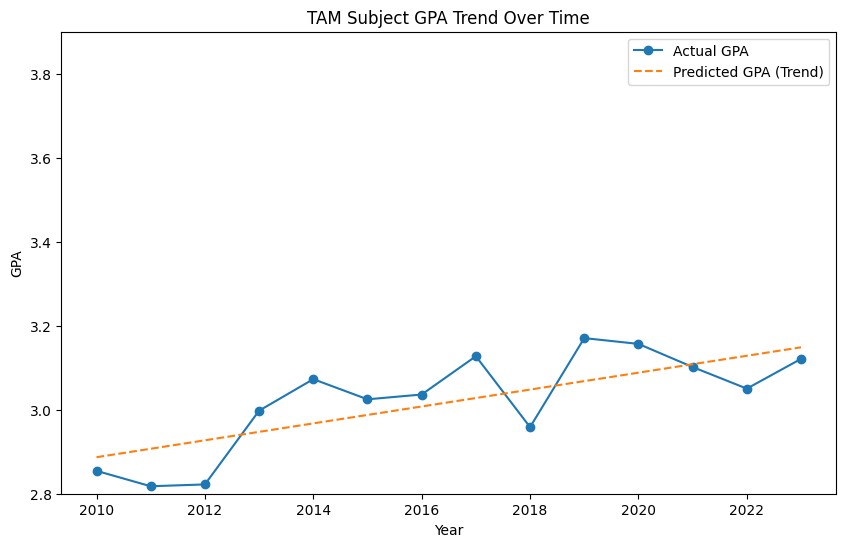

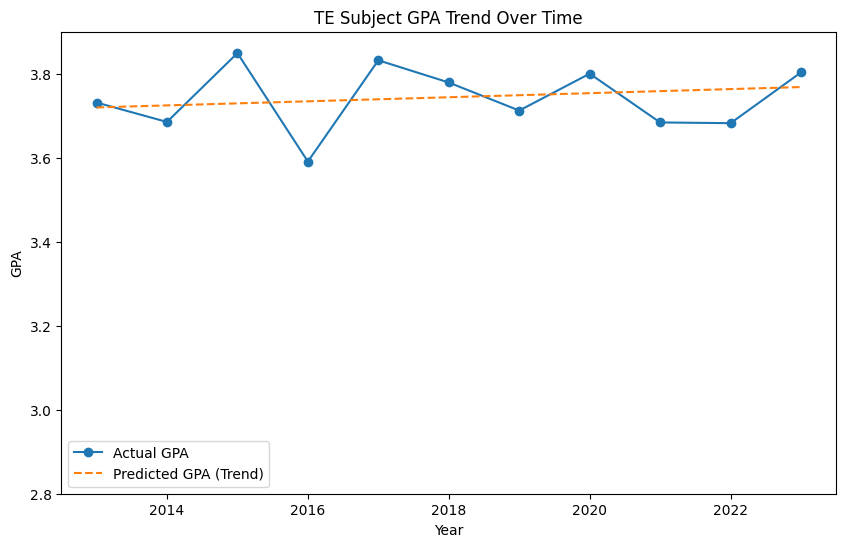

In [ ]:

# plot time-series figure
for subject in target_subjects:
    # substract the subjects from Grainger Engineer
    subject_data = subject_gpa[subject_gpa['Subject'] == subject]

    # check if the dataset is large enough
    if len(subject_data) < 5:
        print(f"Skipping {subject} due to insufficient data")
        continue

    # substract the main properties
    X = subject_data[['Year']]
    y = subject_data['GPA']

    # split the dataset into training and validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # predict GPA
    y_pred = model.predict(X)

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(X['Year'], y, label="Actual GPA", marker='o')
    plt.plot(X['Year'], y_pred, label="Predicted GPA (Trend)", linestyle='--')
    plt.ylim([2.8, 3.9])
    plt.xlabel("Year")
    plt.ylabel("GPA")
    plt.title(f"{subject} Subject GPA Trend Over Time")
    plt.legend()
    plt.show()



In [ ]:
# I have imported the SVM model from sklearn, you can use it to train the model and make predictions